In [1]:
pip install sqlalchemy pymysql

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sqlalchemy pandas pymysql

Note: you may need to restart the kernel to use updated packages.


### Problem Statement 18: (Database connection and data upload)
All the files in the clean folder are required to be uploaded to a relational database. The table names should be the same as the file names without the extension. The primary key and foreign key constraints should be included in the tables wherever required.

In [5]:
import pandas as pd
from sqlalchemy import create_engine

username = 'root'
password = 'root'
host = 'localhost'
port = '3306'
database = 'project2'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}')

with engine.connect() as conn:
    conn.execute(f'drop database if exists {database}')
    conn.execute(f'CREATE DATABASE IF NOT EXISTS {database}')


In [106]:
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')


In [6]:

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')


census = pd.read_csv('clean_data2/census.csv')
government_hospitals = pd.read_csv('clean_data2/government_hospitals.csv')
housing = pd.read_csv('clean_data2/housing.csv')
all_hospitals = pd.read_csv('clean_data2/all_hospitals.csv')

census.to_sql('census',  con=engine, if_exists='replace', index=False)
government_hospitals.to_sql('government_hospitals',  con=engine, if_exists='replace', index=False)
housing.to_sql('housing',  con=engine, if_exists='replace', index=False)
all_hospitals.to_sql('all_hospitals',  con=engine, if_exists='replace', index=False)


37

In [7]:
conn.close()
engine.dispose()

### Problem Statement 20: (Run Query on the database and use in python)
Write a query that finds the number of households without a toilet on the premise for each district of the state that has the least hospital bed-to-population ratio. 
Display the information using python.


In [11]:
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')
query='select `State/UT`,district,(households_rural+households_urban)-(Households_Urban_Toilet_Premise+Households_Rural_Toilet_Premise) as no_toilet_on_premise from housing where `State/UT`="Bihar"'
df = pd.read_sql_query(query, engine)
print(df)

   State/UT            district  no_toilet_on_premise
0     Bihar              Araria            635109.254
1     Bihar               Arwal            110184.450
2     Bihar          Aurangabad            370306.868
3     Bihar               Banka            388569.540
4     Bihar           Begusarai            501712.769
5     Bihar           Bhagalpur            428342.145
6     Bihar             Bhojpur            369767.957
7     Bihar               Buxar            251014.440
8     Bihar           Darbhanga            749102.504
9     Bihar                Gaya            606105.919
10    Bihar           Gopalganj            441304.011
11    Bihar               Jamui            302890.690
12    Bihar           Jehanabad            154121.456
13    Bihar     Kaimur (Bhabua)            282556.367
14    Bihar             Katihar            605365.506
15    Bihar            Khagaria            299683.327
16    Bihar          Kishanganj            397736.551
17    Bihar          Lakhisa

### Problem Statement 21: 
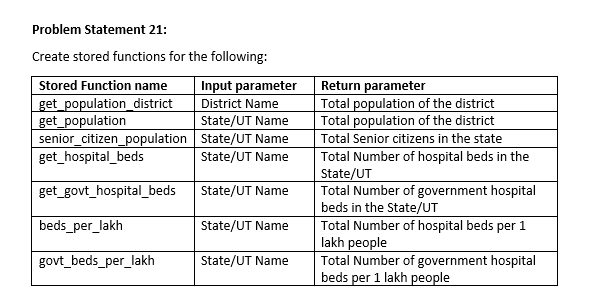


#### get_population_district

In [185]:
import pymysql
import pandas as pd
conn=pymysql.connect(
    host='localhost',
    user='root',
    password='root',
    db='project2')


In [25]:
query='CREATE FUNCTION Get_population_district(district_name VARCHAR(255))RETURNS INT BEGIN DECLARE total_population INT ;SELECT SUM(population) INTO total_population FROM census WHERE district = district_name;RETURN total_population;END;'


0

In [28]:
query3='select Get_population_district("Guntur");'
df3=pd.read_sql_query(query3, engine)
print(df3)

   Get_population_district("Guntur")
0                            4887813



#### get_population

In [92]:
query4='CREATE FUNCTION get_population(state VARCHAR(255)) RETURNS INT BEGIN DECLARE total_population INT ;SELECT SUM(population) INTO total_population FROM census WHERE `State/UT` = state group by `state/UT`; RETURN total_population;END;'

In [186]:
cursor=conn.cursor()

In [93]:

cursor.execute(query4)


0

In [94]:
query5='select get_population("Karnataka");'

In [95]:
cursor.execute(query5)

1

In [96]:
df_ss=pd.read_sql_query(query5, engine)
print(df_ss)

   get_population("Karnataka")
0                     59248274


#### senior_citizen_population

In [59]:
query_s='CREATE FUNCTION senior_citizen_population(state VARCHAR(255)) RETURNS INT BEGIN DECLARE total_senior_citizen INT ;SELECT sum(senior_citizen) INTO total_senior_citizen FROM census WHERE `State/UT` = state group by `State/UT`;RETURN total_senior_citizen;END'

In [60]:

cursor.execute(query_s)

0

In [61]:
query='select senior_citizen_population("Karnataka");'
df_s=pd.read_sql_query(query, engine)
print(df_s)

   senior_citizen_population("Karnataka")
0                                10632806


##### get_hospital_beds

In [62]:
query='CREATE FUNCTION get_hospital_beds(state VARCHAR(255))RETURNS INT BEGIN  DECLARE total_hospital_beds INT ; SELECT HospitalBeds INTO total_hospital_beds FROM all_hospitals WHERE `State/UT` = state ; RETURN total_hospital_beds; END'

In [63]:
cursor.execute(query)

0

In [64]:
queryn='select get_hospital_beds("Karnataka");'
df_n=pd.read_sql_query(queryn, engine)
print(df_n)

   get_hospital_beds("Karnataka")
0                           56333


##### get_govt_hospital_beds

In [69]:
query_govt='CREATE FUNCTION get_govt_hospital_beds(state VARCHAR(255))RETURNS INT BEGIN  DECLARE total_govt_hospital_beds INT ; SELECT (Rural_government_beds+urban_government_beds) INTO total_govt_hospital_beds FROM government_hospitals WHERE `State/UT` = state ; RETURN total_govt_hospital_beds;END'

In [70]:
cursor.execute(query_govt)

0

In [71]:
queryn='select get_govt_hospital_beds("Karnataka");'
df_n2=pd.read_sql_query(queryn, engine)
print(df_n2)

   get_govt_hospital_beds("Karnataka")
0                                70165


#### beds_per_lakh

In [82]:
query_b='Create function beds_per_lakh(state varchar(255)) returns int begin declare total_beds_per_lakh int; with ct1 as  (SELECT c.`State/UT`, sum(c.Population) as Population from census c group by  c.`State/UT` )select (a.HospitalBeds/ct1.Population)*100000 into total_beds_per_lakh from ct1 join all_hospitals a on ct1.`State/UT` = a.`State/UT` where ct1.`State/UT` = state ;return total_beds_per_lakh;END'

In [83]:
cursor.execute(query_b)

0

In [84]:
queryb='select beds_per_lakh("Karnataka");'
df_b=pd.read_sql_query(queryb, engine)
print(df_b)

   beds_per_lakh("Karnataka")
0                          95


#### govt_beds_per_lakh

In [87]:
query_g='Create function govt_beds_per_lakh(state varchar(255)) returns int  begin  declare total_govt_beds_per_lakh int;  with ct1 as  (SELECT c.`State/UT`, sum(c.Population) as Population from census c group by  c.`State/UT` )select (((a.rural_government_beds)+(a.urban_government_beds))/ct1.Population)*100000 into total_govt_beds_per_lakh from ct1 join government_hospitals a on ct1.`State/UT` = a.`State/UT` where ct1.`State/UT` = state ;return total_govt_beds_per_lakh;END'

In [88]:
cursor.execute(query_g)

0

In [89]:
queryg='select govt_beds_per_lakh("bihar");'
df_g=pd.read_sql_query(queryg, engine)
print(df_g)

   govt_beds_per_lakh("Karnataka")
0                              118


### Problem Statement 22: 
It was reported* that in the north-eastern states, senior citizens are facing some issues in getting beds in a government hospital. Amir, from the department of healthcare, has requested a report on the healthcare situation in the north-eastern states.

The north-eastern states are listed in (Data/north_east_states.txt). Read the file and extract the state names using python and write a query to find the following information about those states from the database. Use the stored functions created earlier wherever relevant.

	State Name

	Population

	Senior Citizen Population

	Number of Government Hospital

	Number of Government Hospital Beds

	Number of Government Hospital beds for 1 Lakh population 
(Round the number to the nearest integer)

	Number of Government Hospital beds for 1 Lakh senior citizen
(Round the number to the nearest integer)

The rows should be sorted by the number of Government Hospital beds for 1 Lakh senior citizens in ascending order.


In [175]:
#There is no north_east_states.txt file in the dataset provided
north_east_states=['arunachal pradesh','assam','manipur','meghalaya','mizoram','nagaland','tripura','sikkim']

In [176]:
table='create table north_east_states (states varchar(50))'
cursor.execute(table)
    

0

In [177]:
values=['arunachal pradesh','assam','manipur','meghalaya','mizoram','nagaland','tripura','sikkim']
table_name='north_east_states'
ins=f"INSERT INTO {table_name} (states) VALUES (%s)"
with conn.cursor() as cursor:
    for state in values:
        cursor.execute(ins, state)
    conn.commit()

# close the connection
#connection.close()
    

In [178]:
queryf="""SELECT distinct states, get_population(states) as population, 
senior_citizen_population(states) as senior_citizen_population, 
get_govt_hospital_beds(states) as Number_of_Government_Hospital_Beds,
beds_per_lakh(states) as Number_of_Hospital_Beds, 
govt_beds_per_lakh(states) as Number_of_government_Hospital_Beds ,
(govt_beds_per_lakh(states)/senior_citizen_population(states))*get_population(states) as Number_of_Govt_Hospital_beds_per_Lakh_senior_citizen
FROM north_east_states order by Number_of_Govt_Hospital_beds_per_Lakh_senior_citizen;"""


In [181]:
cursor.execute(queryf)

ProgrammingError: Cursor closed

In [138]:
result=cursor.fetchall()
result

(('manipur', 2855794, 409796, 1427, 90, 50, Decimal('348.4383')),
 ('assam', 31205576, 4127732, 17142, 61, 55, Decimal('415.7831')),
 ('tripura', 3673917, 568604, 4417, 133, 120, Decimal('775.3545')),
 ('nagaland', 1978502, 211983, 1880, 98, 95, Decimal('886.6637')),
 ('mizoram', 1097206, 144061, 1997, 211, 182, Decimal('1386.1585')),
 ('meghalaya', 2966889, 287754, 4457, 155, 150, Decimal('1546.5740')),
 ('arunachal pradesh', 1383727, 139635, 2404, 168, 174, Decimal('1724.2691')),
 ('sikkim', 610577, 82725, 1560, 188, 255, Decimal('1882.1048')))

In [180]:
df_22=pd.read_sql_query(queryf, engine)
df_22

,states,population,senior_citizen_population,Number_of_Government_Hospital_Beds,Number_of_Hospital_Beds,Number_of_government_Hospital_Beds,Number_of_Govt_Hospital_beds_per_Lakh_senior_citizen
0,manipur,2855794,409796,1427,90,50,348.4383
1,assam,31205576,4127732,17142,61,55,415.7831
2,tripura,3673917,568604,4417,133,120,775.3545
3,nagaland,1978502,211983,1880,98,95,886.6637
4,mizoram,1097206,144061,1997,211,182,1386.1585
5,meghalaya,2966889,287754,4457,155,150,1546.5740
6,arunachal pradesh,1383727,139635,2404,168,174,1724.2691
7,sikkim,610577,82725,1560,188,255,1882.1048


In [140]:
df_res=df_22.copy()

In [141]:
df_res

,states,population,senior_citizen_population,Number_of_Government_Hospital_Beds,Number_of_Hospital_Beds,Number_of_government_Hospital_Beds,Number_of_Govt_Hospital_beds_per_Lakh_senior_citizen
0,manipur,2855794,409796,1427,90,50,348.4383
1,assam,31205576,4127732,17142,61,55,415.7831
2,tripura,3673917,568604,4417,133,120,775.3545
3,nagaland,1978502,211983,1880,98,95,886.6637
4,mizoram,1097206,144061,1997,211,182,1386.1585
5,meghalaya,2966889,287754,4457,155,150,1546.5740
6,arunachal pradesh,1383727,139635,2404,168,174,1724.2691
7,sikkim,610577,82725,1560,188,255,1882.1048


### Problem Statement 23: 
The Government wants to run a scheme that would help people build in-premise toilets. 
For that purpose, a secretary has requested a district-wise report using the census data.

Using a stored procedure, Create a district-wise report that shows the total population of each district, the total number of households in the district, the number of households that do NOT have on-premise toilets, and the percentage of the number of households that do NOT toilets in premise to the total number of households. Sort the data in a way that is most useful for the secretary.


In [202]:
query_23="""CREATE PROCEDURE not_on_premise() 
 begin 
select  District,(Households_rural+households_urban) as households,
round((Households_rural+households_urban)-(Households_Rural_Toilet_Premise+Households_Urban_Toilet_Premise),2) as not_on_premise ,
round((((Households_rural+households_urban)-(Households_Rural_Toilet_Premise+Households_Urban_Toilet_Premise))/(Households_rural+households_urban))*100,2) as percen_of_not_on_premise 
from housing order by district ;
END  ;"""

In [203]:
cursor.execute(query_23)

0

In [204]:
query23='call not_on_premise()'

In [205]:
df23=pd.read_sql_query(query23, engine)
df23

,District,households,not_on_premise,percen_of_not_on_premise
0,Adilabad,817714.0,579548.36,70.87
1,Agra,903823.0,487707.17,53.96
2,Ahmadabad,2198552.0,382761.66,17.41
3,Ahmadnagar,1323404.0,708659.24,53.55
4,Aizawl,100911.0,1097.21,1.09
...,...,...,...,...
635,Yadgir,262995.0,231866.54,88.16
636,Yamunanagar,357723.0,127414.54,35.62
637,Yanam,NaN,NaN,NaN
638,Yavatmal,798132.0,545774.73,68.38


### Problem Statement 24: 
An Agency wants to find out if there is a relationship between dilapidated homes and the lack of households for the people. 
Using a stored procedure, create a report that shows the name of each district, its population, the number of liveable houses per 1000 people, and the number of dilapidated households per 1000 people. 
Visualize the relation between these values using an appropriate plot.


In [191]:
query24="""create procedure household_relationship() 
 begin
 select h.District,c.population,
round((round(h.Households_Rural_Livable + h.Households_Urban_Livable)/c.population)*1000,2) as liveable_houses, 
round((round(h.Households_Rural_Dilapidated + h.Households_Urban_Dilapidated)/c.population)*1000,2) as dilapidated_households
 from housing h join census c on (c.`State/UT`,c.district)=(h.`State/UT`,h.district)
 order by h.district;
 END"""

In [192]:
cursor.execute(query24)

0

In [193]:
query_24='call household_relationship()'

In [194]:
df_24=pd.read_sql_query(query_24, engine)
df_24

,District,population,liveable_houses,dilapidated_households
0,Adilabad,2741239.0,96.69,16.42
1,Agra,4418797.0,94.67,6.59
2,Ahmadabad,7214225.0,80.96,2.51
3,Ahmadnagar,4543159.0,84.48,18.51
4,Aizawl,400309.0,51.10,2.28
...,...,...,...,...
635,Yadgir,1174271.0,106.77,11.10
636,Yamunanagar,1214205.0,123.19,16.02
637,Yanam,55626.0,NaN,NaN
638,Yavatmal,2772348.0,124.30,20.76


### Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


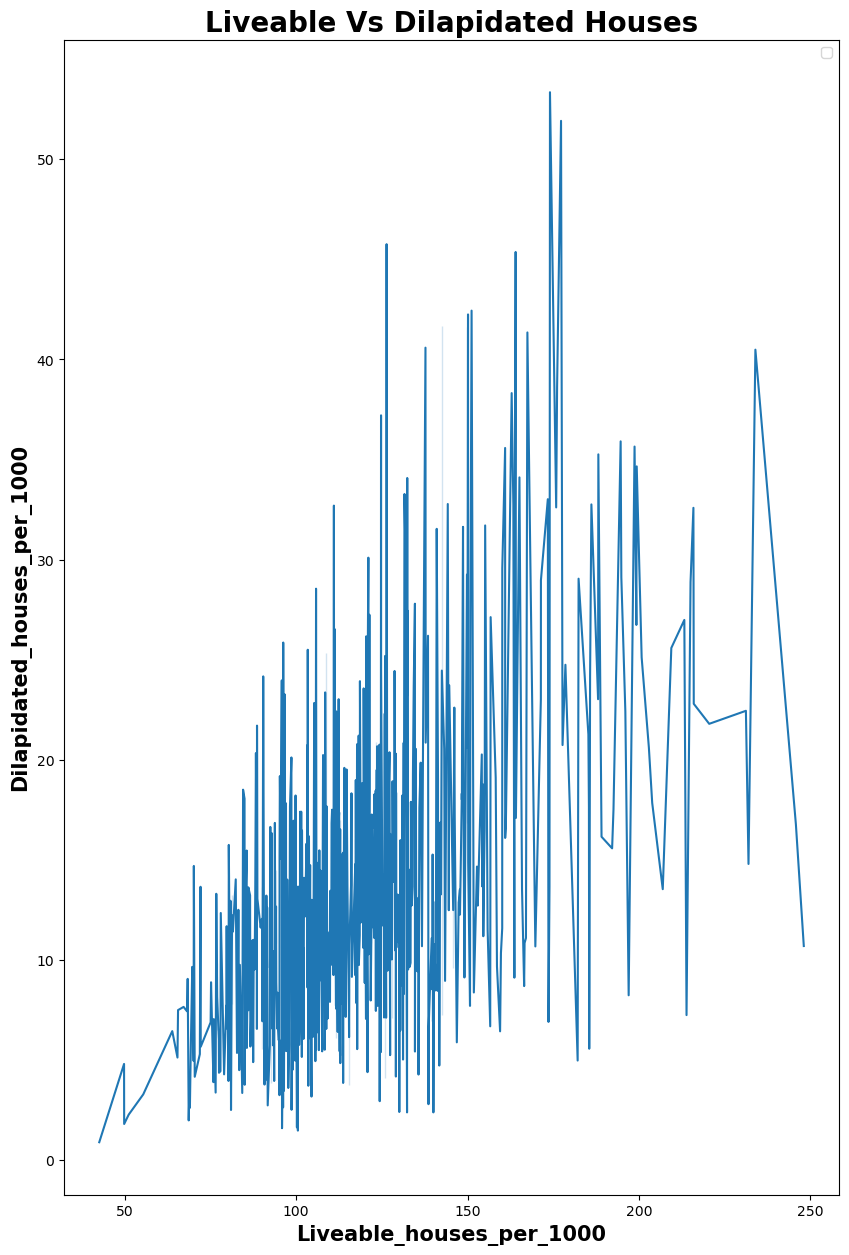

In [199]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,15))
sns.lineplot(x="liveable_houses", y="dilapidated_households", data=df_24)
plt.title("Liveable Vs Dilapidated Houses",fontdict={'fontsize':20,'color':'black','weight':'bold'})
plt.xlabel("Liveable_houses_per_1000",fontdict={'fontsize':15,'color':'black','weight':'bold'})
plt.ylabel("Dilapidated_houses_per_1000",fontdict={'fontsize':15,'color':'black','weight':'bold'})
plt.legend()
plt.show()

### Problem Statement 25: 
The rural development department has requested a report on the healthcare situation in rural areas as compared to urban areas.
Write a query to find the number of hospital beds and government hospital beds per 1 lakh people for rural and urban areas separately for each state, along with the difference between them. 


In [200]:
query_25="""
with pop as
(select `State/UT`, sum(Population) as population from census group by `State/UT`)
select p.`State/UT`,
round((a.HospitalBeds/p.population)*100000) as Hospital_beds_per_lakh,
round((g.Rural_Government_Beds/p.population)*100000) as Rural_govt_hospital_beds_per_lakh,
round((g.Urban_Government_Beds/p.population)*100000)as Urban_govt_hospital_beds_per_lakh,
abs(round((g.Urban_Government_Beds/p.population)*100000-(g.Rural_Government_Beds/p.population)*100000)) as Urban_Rural_govt_beds_diff
from pop p  join all_hospitals a on p.`State/UT`=a.`State/UT` 
join government_hospitals g on p.`State/UT`=g.`State/UT`;"""

In [201]:
df_25=pd.read_sql_query(query_25, engine)
df_25

,State/UT,Hospital_beds_per_lakh,Rural_govt_hospital_beds_per_lakh,Urban_govt_hospital_beds_per_lakh,Urban_Rural_govt_beds_diff
0,Andaman and Nicobar Islands,327.0,151.0,131.0,20.0
1,Andhra Pradesh,123.0,13.0,34.0,21.0
2,Arunachal Pradesh,168.0,154.0,19.0,135.0
3,Assam,61.0,35.0,20.0,15.0
4,Bihar,17.0,6.0,6.0,0.0
5,Chandigarh,356.0,0.0,74.0,74.0
6,Chhattisgarh,56.0,20.0,17.0,3.0
7,Dadra and Nagar Haveli,165.0,79.0,92.0,13.0
8,Daman and Diu,123.0,99.0,0.0,99.0
9,Goa,183.0,96.0,110.0,14.0


### Problem Statement 26: 
New hospitals are under construction* in different locations, and once they are constructed the data in the database is to be updated. Also, when some hospitals non-operational hospital might be removed. Since the data is quite significant there should be a hospital_log table that would store any changes made to the hospital or government_hospital table.

The hospital_log table should contain the name of the district, whether the hospital is situated in urban or rural area, whether the hospital is being added or being removed, date of adding or removing the hospital to/from the existing facilities, and whether it is government hospital or not. The a row in the table must be added automatically whenever a new hospital is added, or an existing hospital is removed


In [230]:
table_hosp="""
CREATE TABLE if not exists hospital_log(
  State_UT varchar(30),
  urban_rural enum('rural','urban'),
  added_removed enum('added','removed'),
  action_date date,
  government_private enum('government','private'));
"""

In [231]:
cursor.execute(table_hosp)

0

In [232]:
trig="""CREATE TRIGGER if not exists government_hospital_trigger
AFTER update ON government_hospitals
FOR EACH ROW
BEGIN
declare rural_urban varchar(30);
declare added_removed varchar(30);
    IF  new.Rural_Government_Hospitals-old. Rural_Government_Hospitals > 0 THEN
        set rural_urban="rural";
        set added_removed="Added";
    ELSE
        set rural_urban="rural";
        set added_removed="Removed";
    END IF;
    IF  new.Urban_Government_Hospitals-old.Urban_Government_Hospitals > 0 THEN
        set rural_urban="urban";
        set added_removed="Added";
    ELSE
        set rural_urban="urban";
        set added_removed="Removed";
    END IF;

INSERT INTO hospital_log (State_UT, urban_rural, added_removed, action_date, government_private)
VALUES (OLD.`State/UT`, rural_urban,added_removed, CURDATE(), 'governmet');
END"""
    

In [233]:
cursor.execute(trig)

0

### Problem Statement 27:
New hospital beds are to be added in different government and private hospitals in different locations, and some non-operational hospital beds might be removed from hospitals. Since the data is quite significant there should be a hospital_bed_log table that would store any changes made to the hospital or government_hospital table with respect to number of hospital beds.

The hospital_bed_log table should contain the name of the district, whether the hospital is situated in urban or rural area, date of adding or removing hospital beds, the number of beds being added or removed, whether it is being added or removed and whether it is added to/removed from government hospital or not. The table must be updated automatically whenever new hospital beds are added to or removed from the existing facility.



In [234]:
query_27="""CREATE TABLE hospital_bed_log(
State_UT varchar(30),
rural_urban varchar(30),
added_removed varchar(30),
action_date date,
no_of_beds int,
government_private varchar(30)
) """

In [235]:
cursor.execute(query_27)

0

In [ ]:
trig_27="""CREATE TRIGGER all_hospital_beds_trigger
AFTER update ON all_hospitals
FOR EACH ROW
BEGIN
    declare urban_rural varchar(30);
    declare added_removed varchar(30);
    declare no_of_beds int;
    if new.Rural_Government_Beds -old.Rural_Government_Beds >0 then
    set added_removed='added';
    set no_of_beds=new.Rural_Government_Beds -old.Rural_Government_Beds;
    set urban_rural='rural';
    else
    set added_removed='removed';
    set no_of_beds=old.Rural_Government_Beds -new.Rural_Government_Beds;
    set urban_rural='rural';
    end if;
    if new.Urban_Government_Beds -old.Urban_Government_Beds >0 then
    set added_removed='added';
    set no_of_beds=new.Urban_Government_Beds -new.Urban_Government_Beds;
    set urban_rural='urban';
    else
    set added_removed='removed';
    set no_of_beds=old.Urban_Government_Beds -new.Urban_Government_Beds;
    set urban_rural='urban';
    end if;
    
INSERT INTO hospital_bed_log (State_UT, urban_rural, added_removed, action_date,no_of_beds, government_private)
VALUES (OLD.`State/UT`, urban_rural, added_removed, CURDATE(),no_of_beds,'goverment');
END """

In [ ]:
cursor.execute(trig_27)